In [17]:
# Adam Caccavale
# CME 257, HW 3

# using Julia v0.3.11

# I am exploring the BayesNets package
# Info on required packages can be found: http://web.stanford.edu/class/aa228/#!julia.md

In [18]:
# PART 1

using Distributions
using PGFPlots
using BayesNets

The BayesNets package can create a structure containing a series of nodes with conditional probabilities, along with a structure of edges. With this structure inference can be performed to find probabilities of variables incorporating observed data.

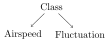

In [19]:
b = BayesNet([:Class, :Airspeed, :Fluctuation])
addEdge!(b, :Class, :Airspeed)
addEdge!(b, :Class, :Fluctuation)

In this example we want to determine if a radar is detecting an airplane or a bird.

In [20]:
# Here we set our initial belief about the object, in this case 50-50
setCPD!(b, :Class, CPDs.Discrete(["bird", "aircraft"], [0.5, 0.5]));

Now we encode our conditional probabilities. Note that the variable airspeed is continuous, while the class of the object and whether there is 'High' or 'Low; fluctuation are discrete variables.

In [21]:
fluctuationParameters = a -> a[:Class] == "bird" ? [0.1, 0.9] : [0.9, 0.1]
setCPD!(b, :Fluctuation, CPDs.Discrete(["low", "hi"], fluctuationParameters));

# if Bird, then Airspeed ~ N(45,10)
# if Aircraft, then Airspeed ~ N(100,40)
airspeedParameters(a::Assignment) = a[:Class] == "bird" ? (45,10) : (100,40)
airspeedCPD = CPDs.Normal(airspeedParameters)
setCPD!(b, :Airspeed, airspeedCPD);

In [22]:
# this is taken from an example from class, and allows the CPDs to be plotted
function plotCPD(cpd::CPDs.CPD, range::(Real,Real), assignments)
    convertAssignmentToString(a) = string(["$k = $v, " for (k,v) in a]...)[1:end-2]
    Axis(Plots.Plot[Plots.Linear(pdf(cpd, a), range, legendentry=convertAssignmentToString(a)) for a in assignments])
end;

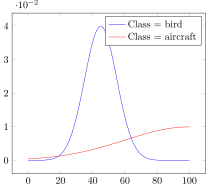

In [23]:
plotCPD(airspeedCPD, (0., 100.), [[:Class=>c] for c in ["bird", "aircraft"]])

Now that we have our Bayesian Network, we can find probability of the object being in a cetain class given our observations. Lets say we measured the airspeed to be 65 and saw low fluctuation

In [24]:
p_bird_not_nomalized = prob(b, [:Class=>"bird", :Airspeed=>65, :Fluctuation=>"low"])
p_airplane_not_nomalized = prob(b, [:Class=>"aircraft", :Airspeed=>65, :Fluctuation=>"low"])

0.003060618731758615

In [25]:
p_bird = p_bird_not_nomalized / (p_bird_not_nomalized + p_airplane_not_nomalized);
p_airplane = p_airplane_not_nomalized / (p_bird_not_nomalized + p_airplane_not_nomalized);
@show p_bird;
@show p_airplane;

p_bird => 0.08105355649776423
p_airplane => 0.9189464435022358


In [26]:
# a quick sanity check...
p_bird + p_airplane

1.0